# Seaborn: JointGrid

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import bs4 as bs
import requests

import re
import os
import datetime
import random

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5, palette='plasma', font='Arial', rc={'figure.figsize':(8,6)})


In [3]:
cars = sns.load_dataset('mpg')

In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Basics

In [5]:
sns.set_style('darkgrid')

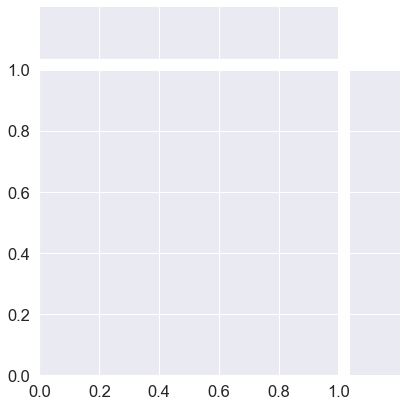

In [6]:
g = sns.JointGrid();

In [7]:
type(g)

seaborn.axisgrid.JointGrid

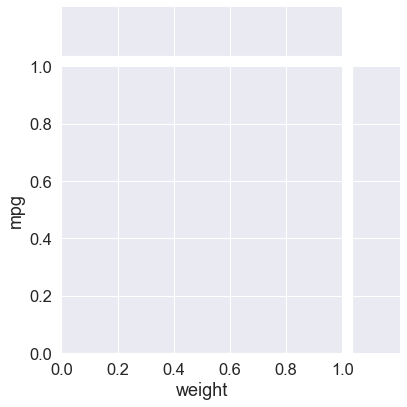

In [8]:
g = sns.JointGrid(data=cars, x='weight', y='mpg');

### `.plot()`

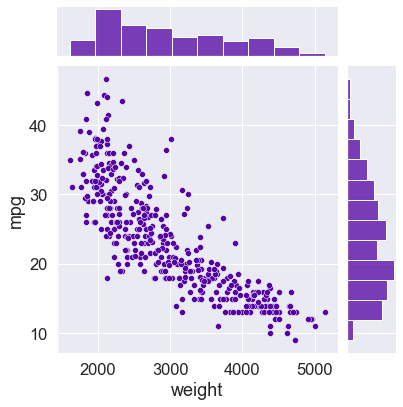

In [9]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot); # Jointplot, marginalplot

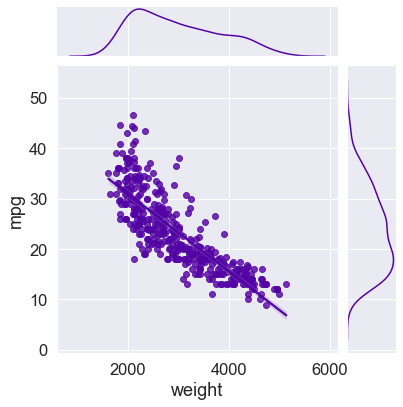

In [10]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.regplot, sns.kdeplot);

## Joint and Marginal Plots

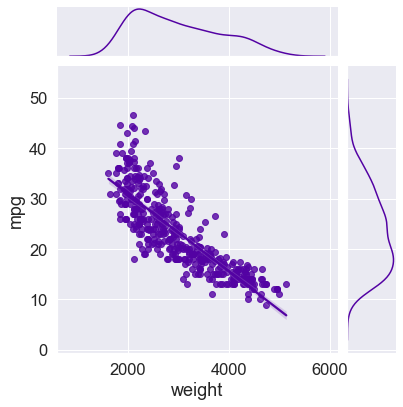

In [11]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.regplot, sns.kdeplot);

### `.plot_joint(), .plot_marginals()`

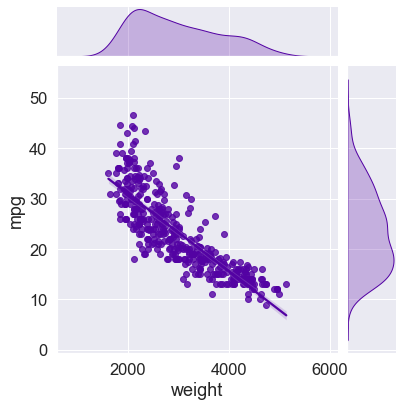

In [12]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot)
g.plot_marginals(sns.kdeplot, fill=True);  #syntax used to style plot types separately

### JointGrid Axes

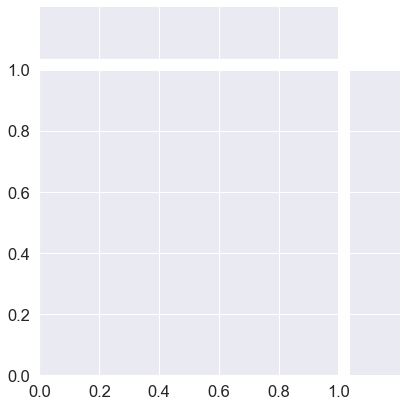

In [13]:
g = sns.JointGrid();

In [14]:
type(g.ax_marg_x)

matplotlib.axes._subplots.AxesSubplot

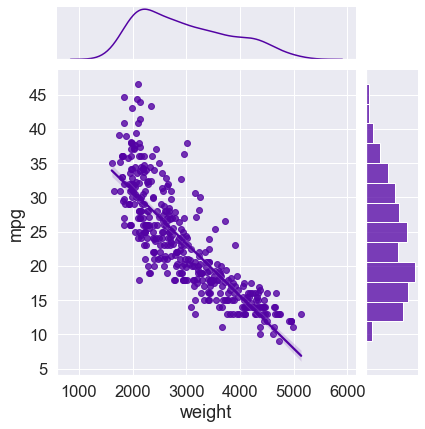

In [15]:
g = sns.JointGrid()
x, y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint)
sns.kdeplot(x=x, ax=g.ax_marg_x)
sns.histplot(y=y, ax=g.ax_marg_y);

## Hue

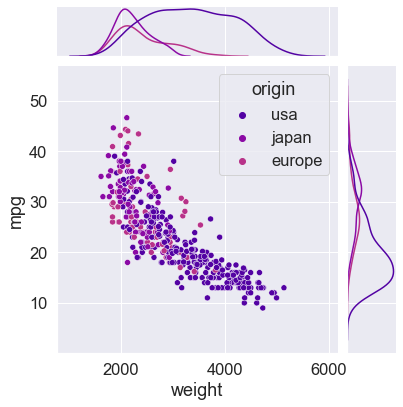

In [16]:
g = sns.JointGrid(data=cars, x='weight', y='mpg', hue='origin')
g.plot(sns.scatterplot, sns.kdeplot);

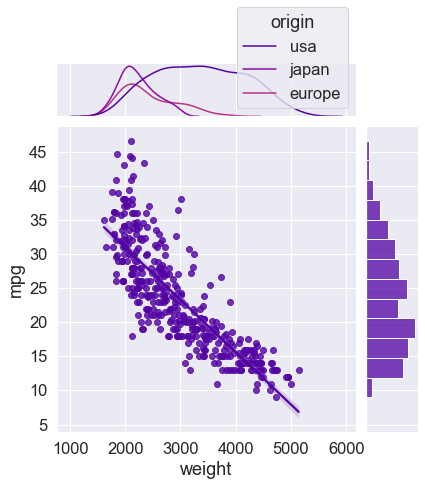

In [17]:
# TODO - axes are important
g = sns.JointGrid()
x, y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint)
sns.kdeplot(x=x, ax=g.ax_marg_x, hue=cars.origin)  
sns.histplot(y=y, ax=g.ax_marg_y);

## Styling

### General Styling

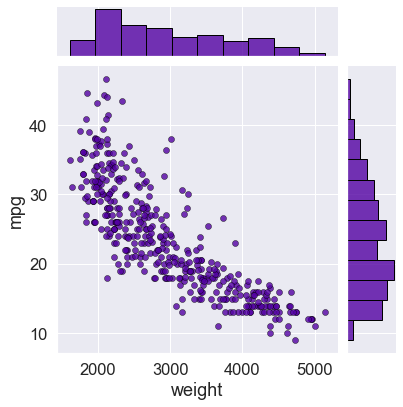

In [18]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot, alpha=0.8, edgecolor='black');

### Plot-specific Keywords

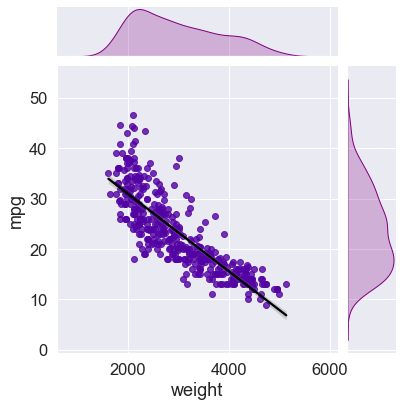

In [19]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot, line_kws={'color': 'black'})
g.plot_marginals(sns.kdeplot, fill=True, color='purple');

### Joint Grid Properties

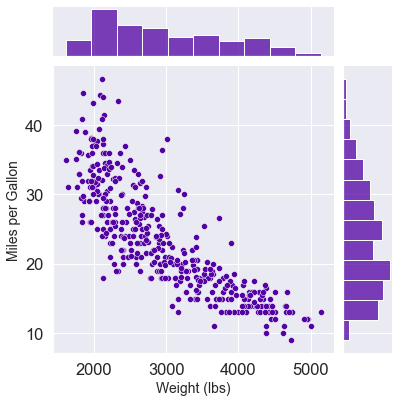

In [20]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot)
g.set_axis_labels(xlabel='Weight (lbs)', ylabel='Miles per Gallon', fontsize=14)
#g.savefig('Joint_Grid_Example.png');

## Thumbnail and Overlays

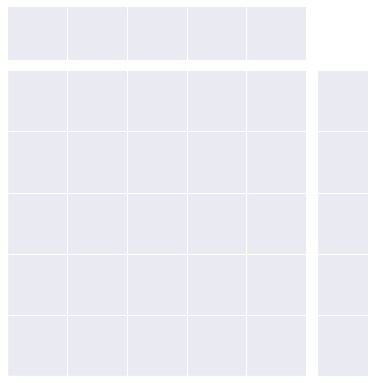

In [21]:
g = sns.JointGrid()
ax = g.ax_joint
ax.set_xticklabels([])
ax.set_yticklabels([]);
#g.savefig('25jointgrid_image_blank.png', dpi=200)

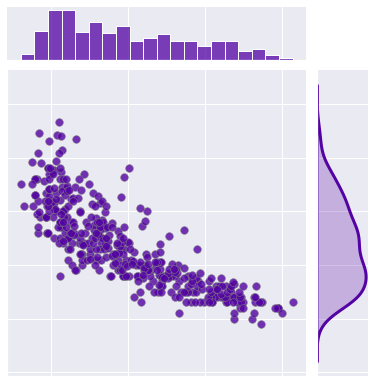

In [22]:
g = sns.JointGrid()
x,y = cars.weight, cars.mpg
sns.scatterplot(x, y, ax=g.ax_joint, s=60, alpha=0.8, ec='gray')
sns.histplot(x=x, ax=g.ax_marg_x, bins=20)
sns.kdeplot(y=y, ax=g.ax_marg_y, fill=True, lw=3)
g.set_axis_labels(xlabel='', ylabel='')

ax = g.ax_joint
ax.set_xticklabels([])
ax.set_yticklabels([]);
#g.savefig('25jointgrid_image_differentPlots.png', dpi=200);

### Thumbnail

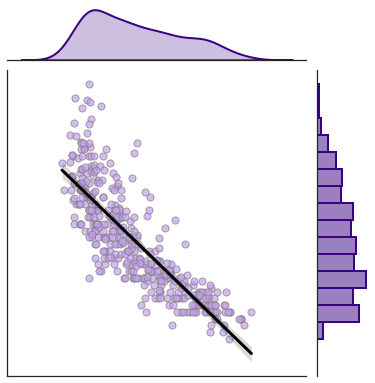

In [23]:
sns.set_style('white')

g = sns.JointGrid()
x,y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint, ci=99, 
            scatter_kws={'color': 'xkcd:lavender', 'alpha': 0.7, 'ec': 'gray', 's': 50}, 
            line_kws={'color': 'black', 'lw': 3}
           )
sns.kdeplot(x=x, ax=g.ax_marg_x, fill=True, color='xkcd:indigo', lw=2 )
sns.histplot(y=y, bins=15, ax=g.ax_marg_y, lw=2, color='xkcd:indigo', alpha=0.5, ec='xkcd:indigo')
g.set_axis_labels(xlabel='', ylabel='')

ax = g.ax_joint
ax.set_xticklabels([])
ax.set_yticklabels([]);
#g.savefig('25jointgrid_image_thumb.png', dpi=200);

In [24]:
# JointGrid
df = sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Text(0.5, 1.0, 'JointGrid Example')

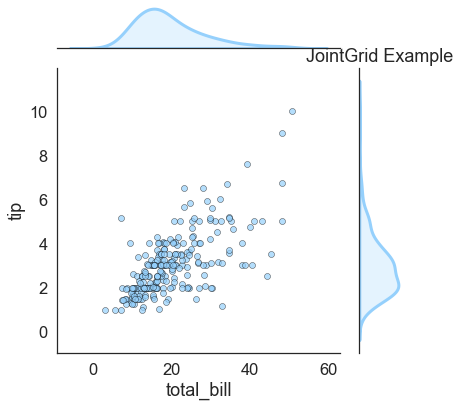

In [27]:
g=sns.JointGrid(data=df, x='total_bill', y='tip')
g.plot_joint(sns.scatterplot, color='xkcd:light blue', alpha=0.7, edgecolor='black')
g.plot_marginals(sns.kdeplot, color='xkcd:light blue', fill=True, shade=True, lw=3)
plt.tight_layout()
plt.title('JointGrid Example')

<AxesSubplot:xlabel='Count', ylabel='tip'>

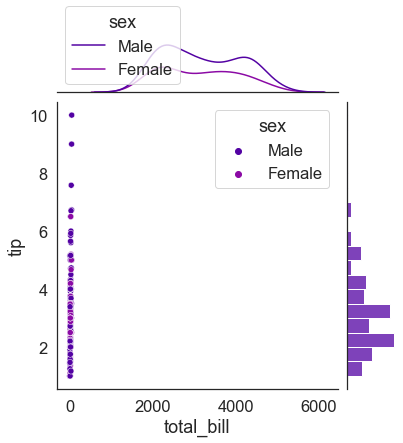

In [30]:
g = sns.JointGrid(data=df, x='total_bill', y='tip',hue='sex')
g.plot_joint(sns.scatterplot)
sns.kdeplot(x=x, ax=g.ax_marg_x, hue=df.sex)  
sns.histplot(data=df,y='tip',ax=g.ax_marg_y)

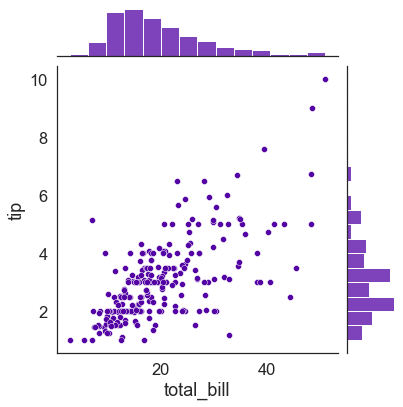

In [34]:
sns.jointplot(data=df,x='total_bill',y='tip',palette='rainbow')